In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [40]:
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')

In [41]:
train_dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [42]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

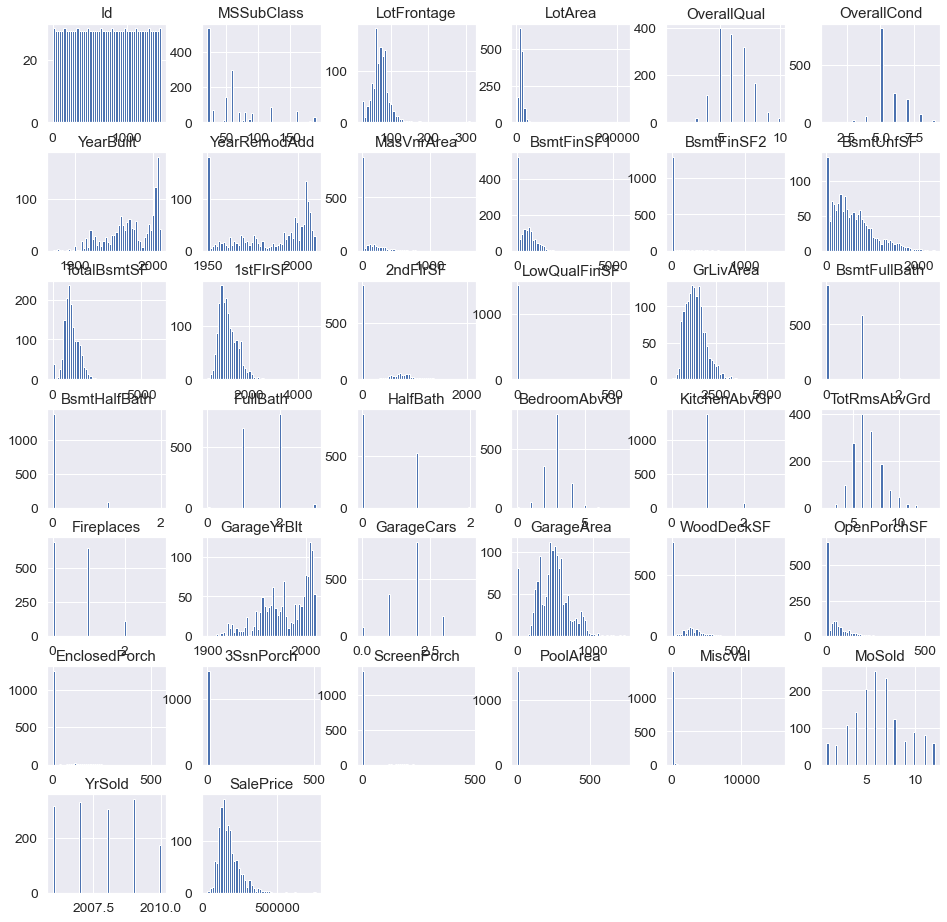

In [43]:
%matplotlib inline
train_dataset.hist(bins=50, figsize=(16,16))
plt.show()

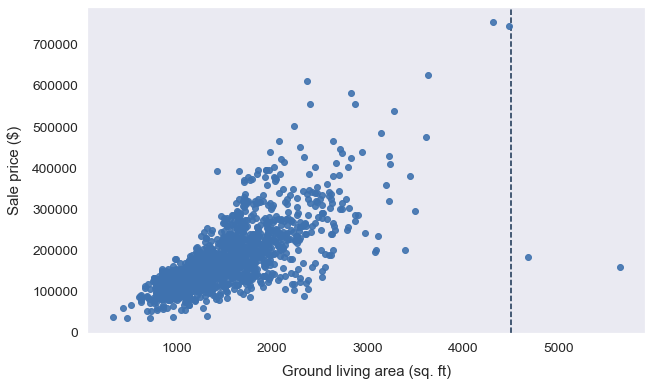

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid()
ax.scatter(train_dataset["GrLivArea"], train_dataset["SalePrice"], c="#3f72af", zorder=3, alpha=0.9)
ax.axvline(4500, c="#112d4e", ls="--", zorder=2)
ax.set_xlabel("Ground living area (sq. ft)", labelpad=10)
ax.set_ylabel("Sale price ($)", labelpad=10)
plt.show()

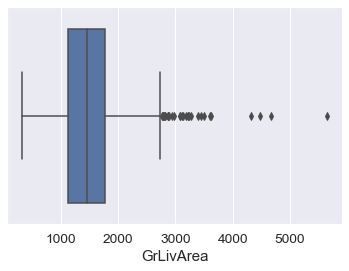

In [45]:
sns.boxplot(train_dataset.GrLivArea)
plt.show()

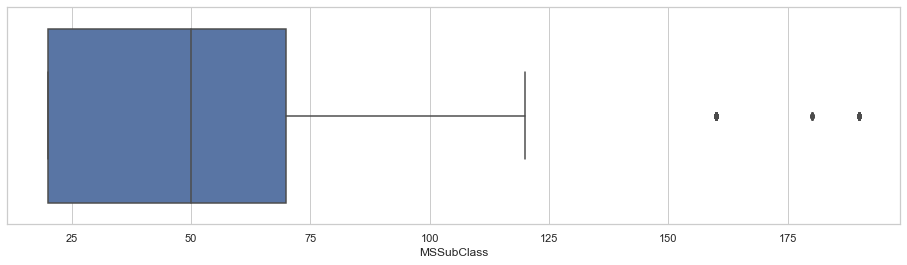

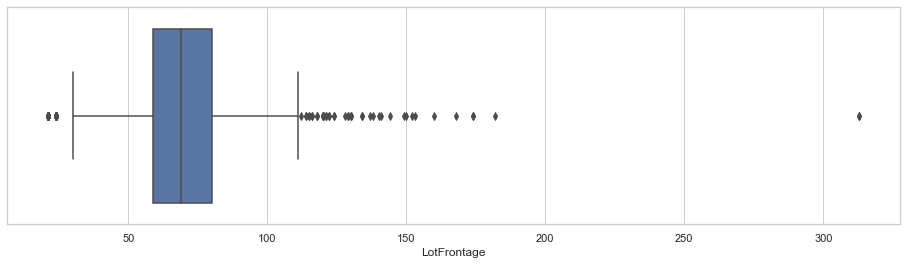

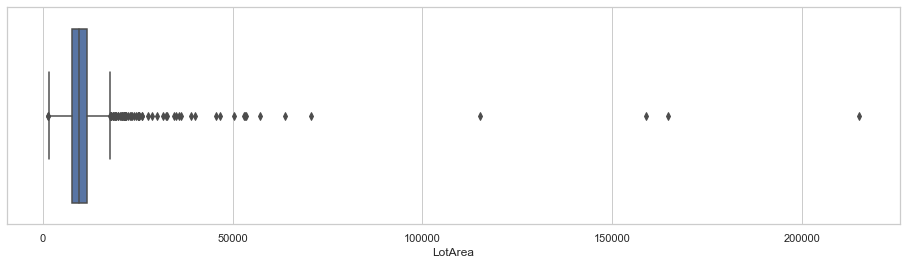

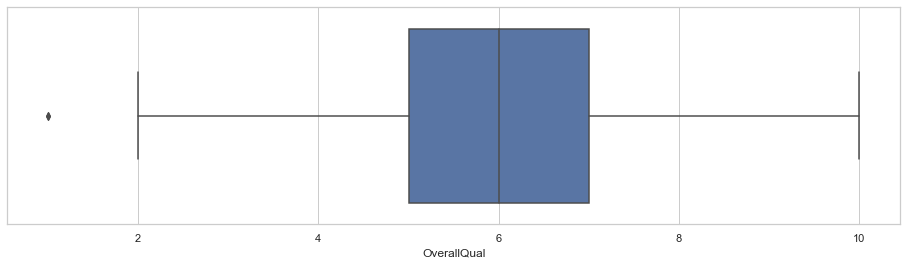

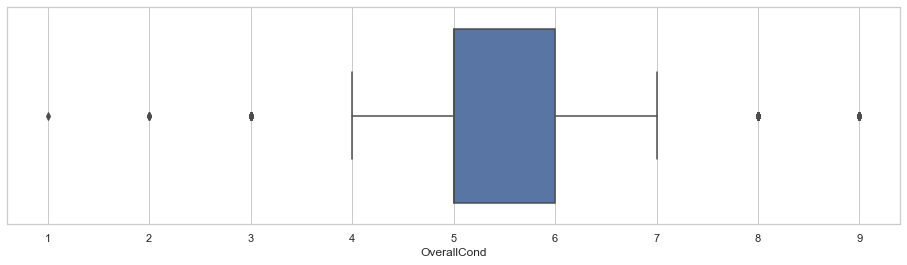

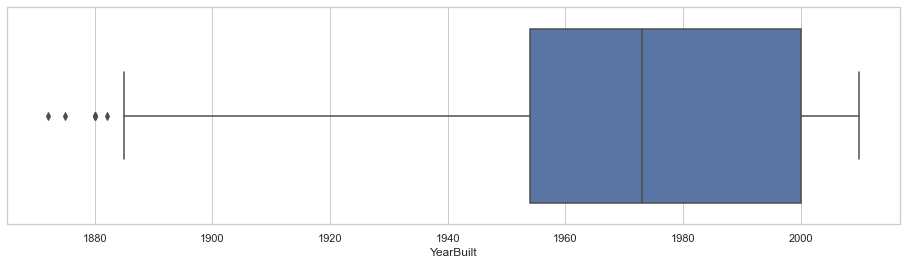

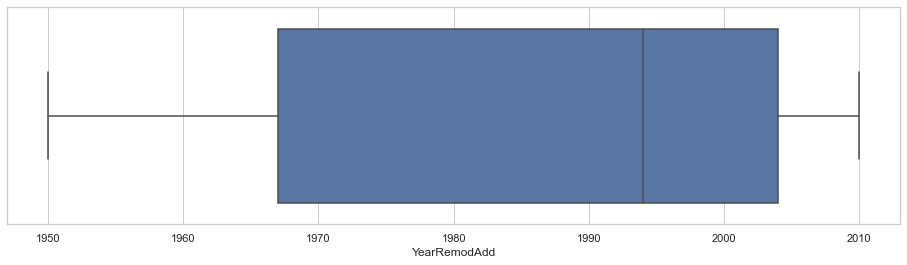

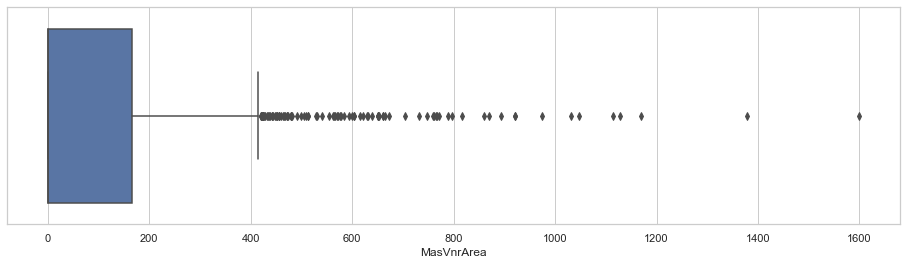

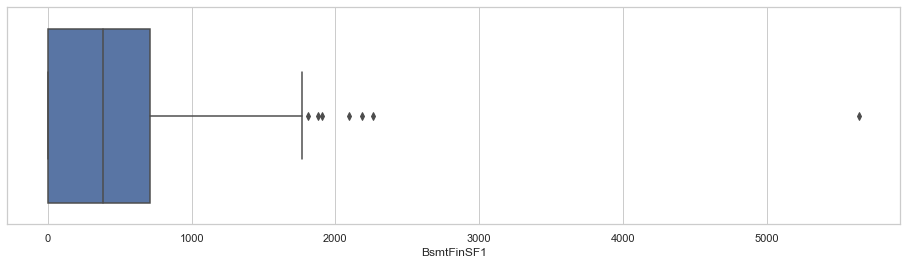

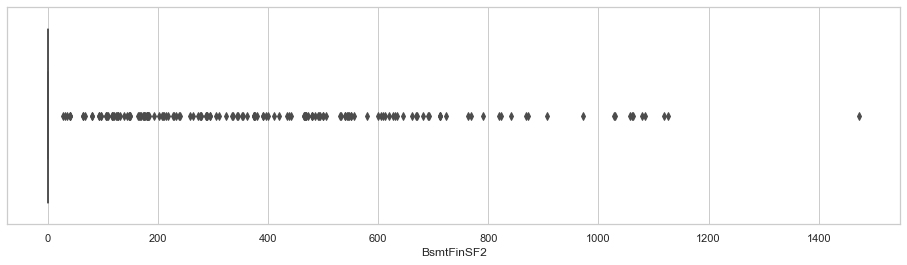

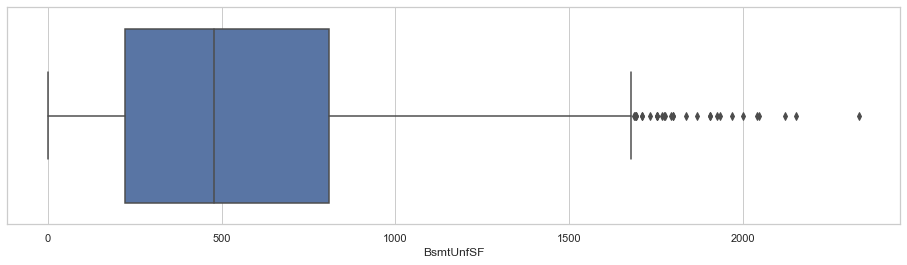

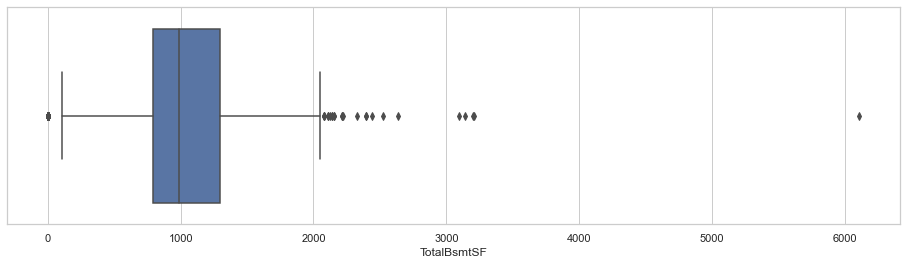

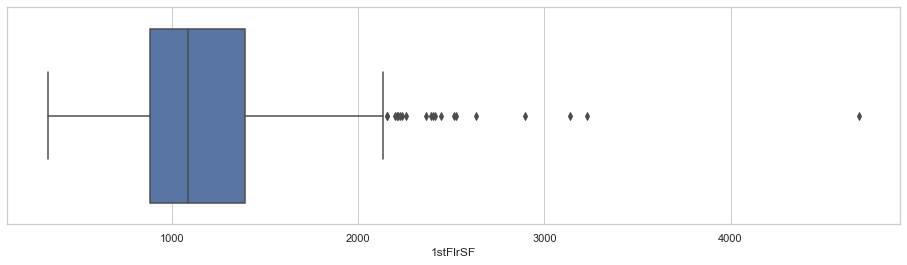

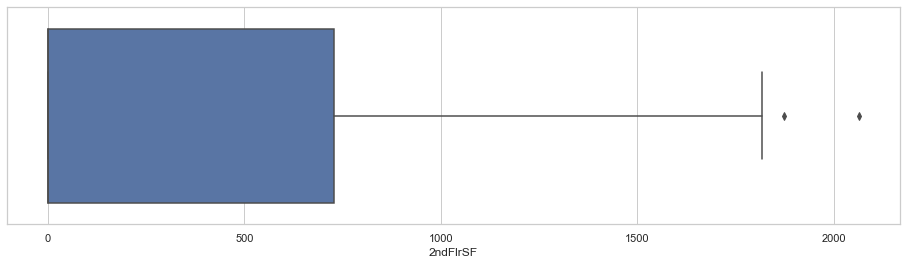

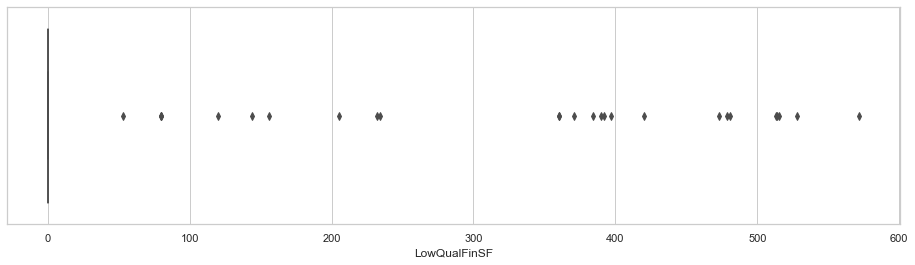

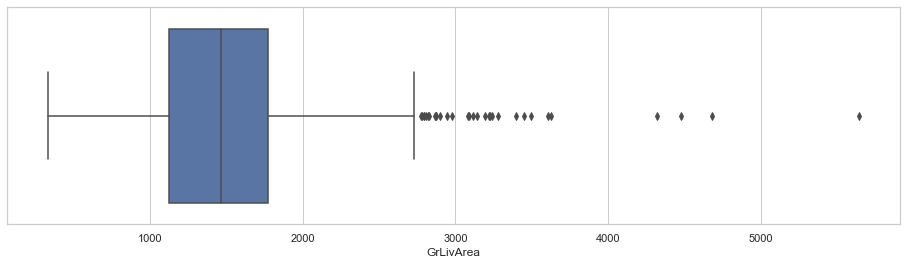

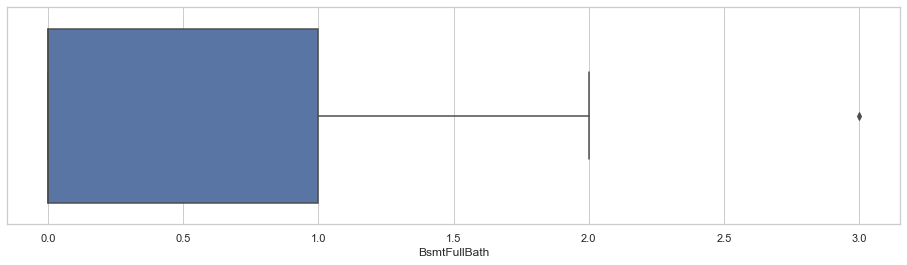

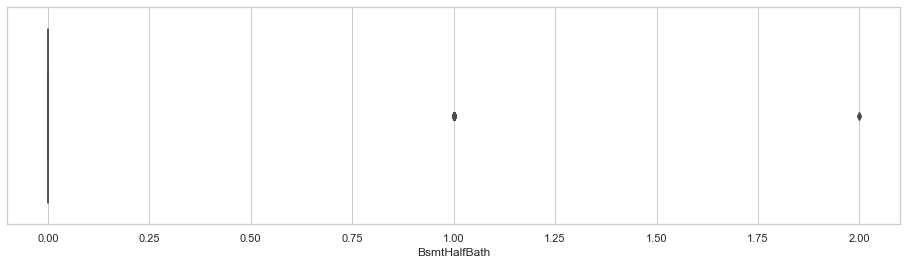

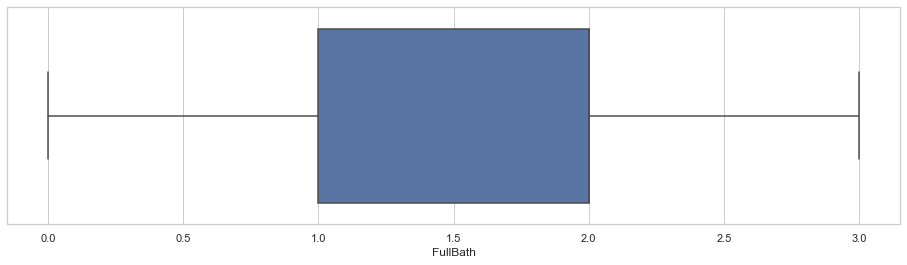

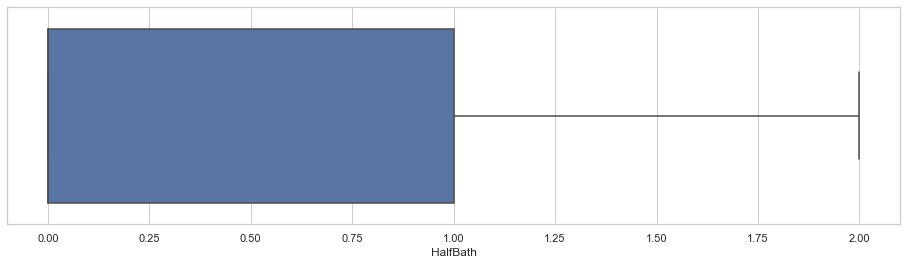

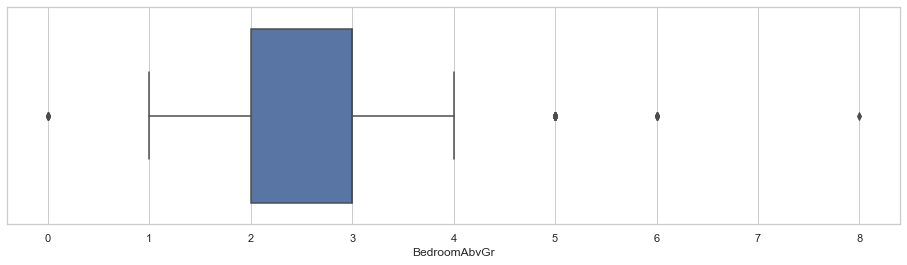

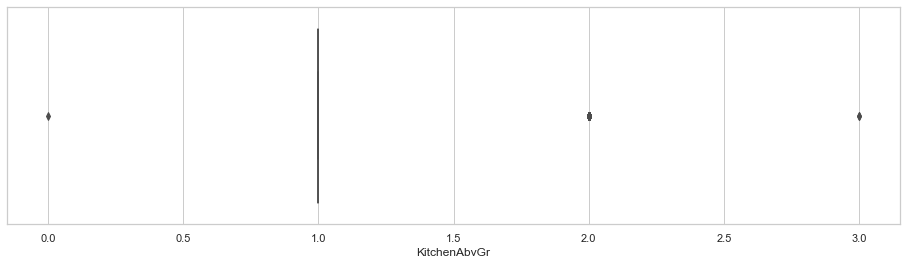

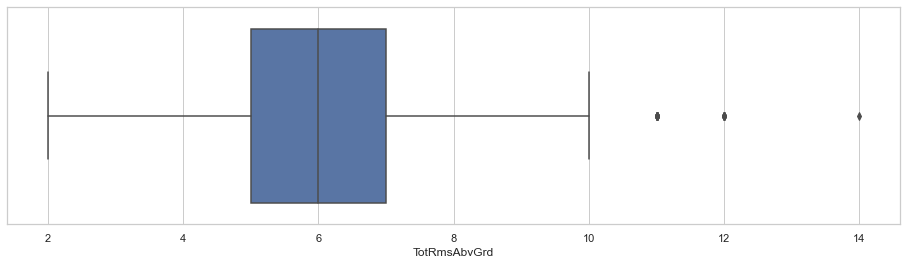

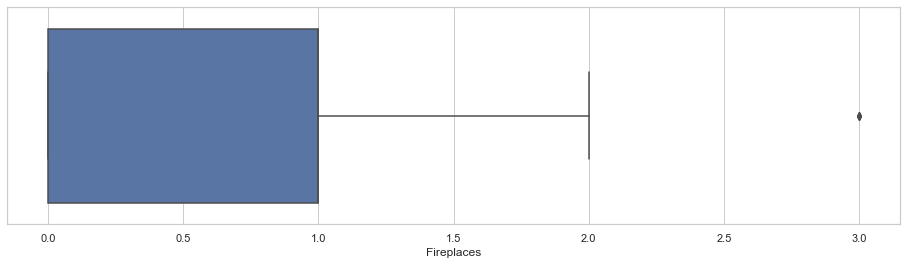

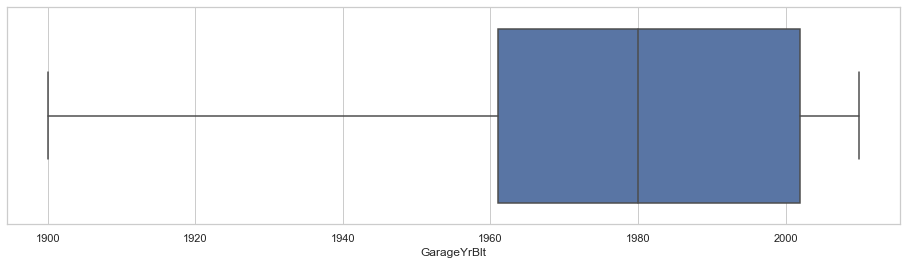

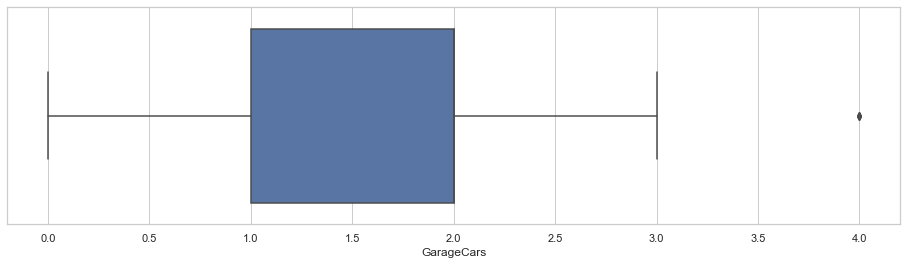

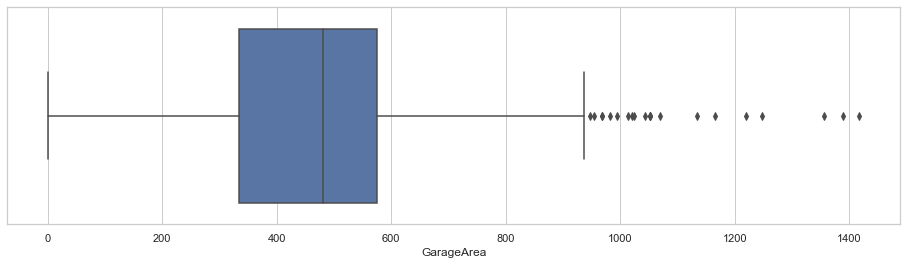

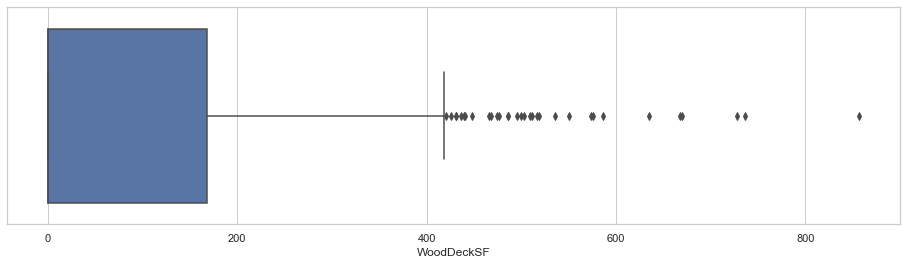

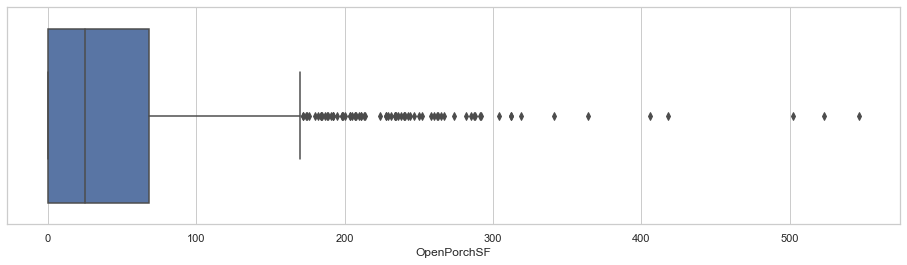

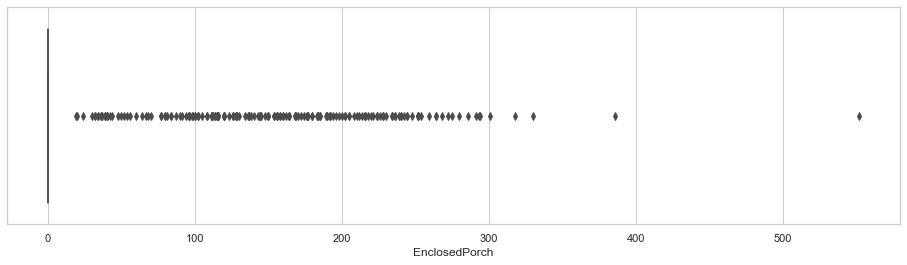

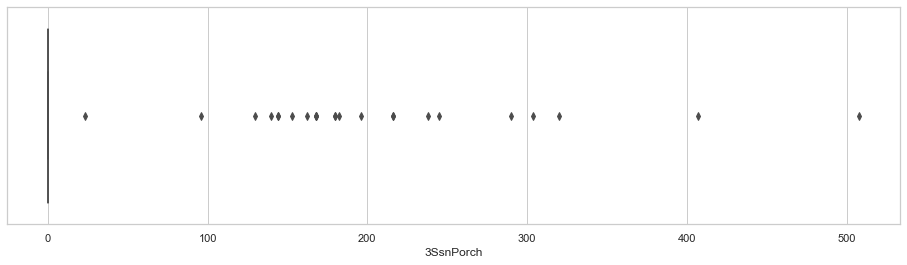

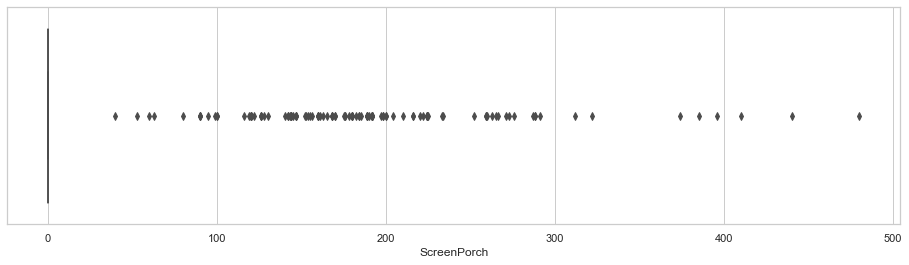

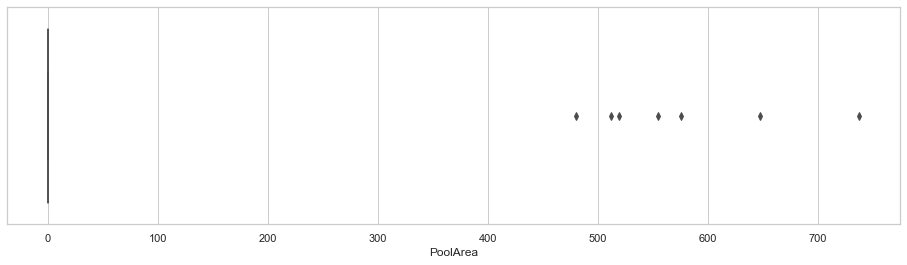

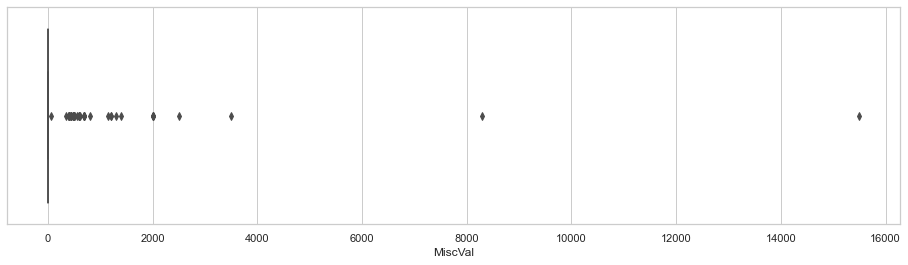

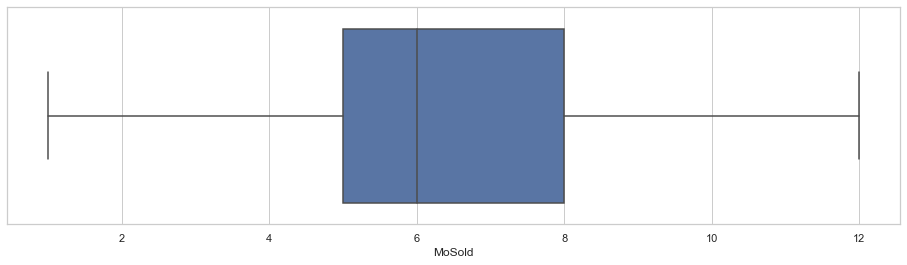

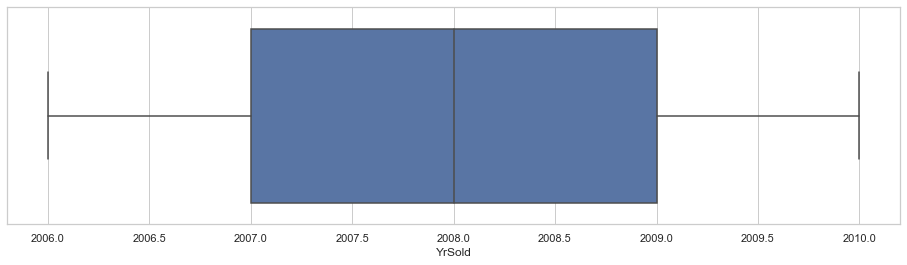

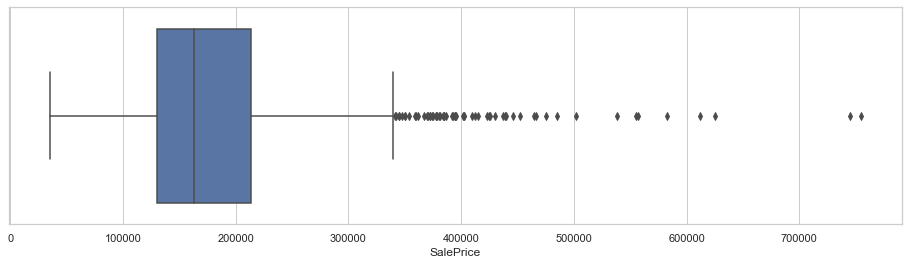

In [46]:
# find outliers for all the numerical dataset
numerical_df = train_dataset.select_dtypes(exclude=['object'])
numerical_df = numerical_df.drop(["Id"], axis=1)
for column in numerical_df:
    plt.figure(figsize=(16, 4))
    sns.set_theme(style="whitegrid")
    sns.boxplot(numerical_df[column])

In [47]:
train_dataset.get("SalePrice").describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

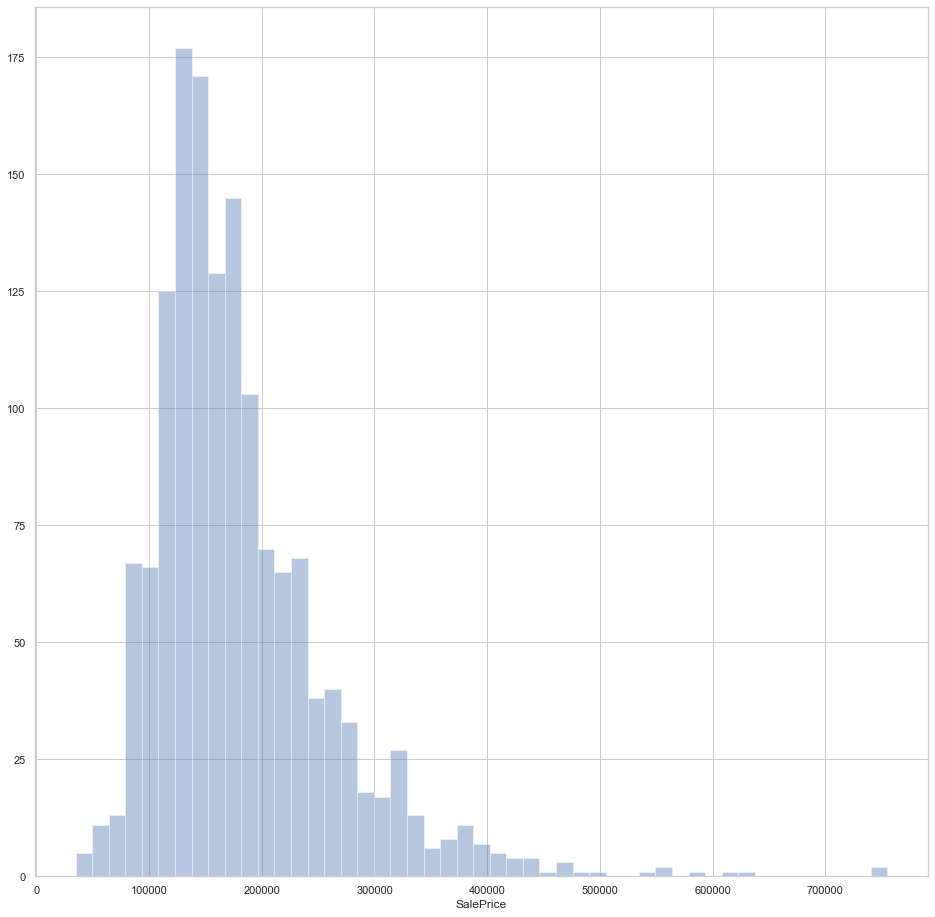

In [48]:
f, ax = plt.subplots(figsize=(16, 16))
sns.distplot(train_dataset.get("SalePrice"), kde=False)
plt.show()

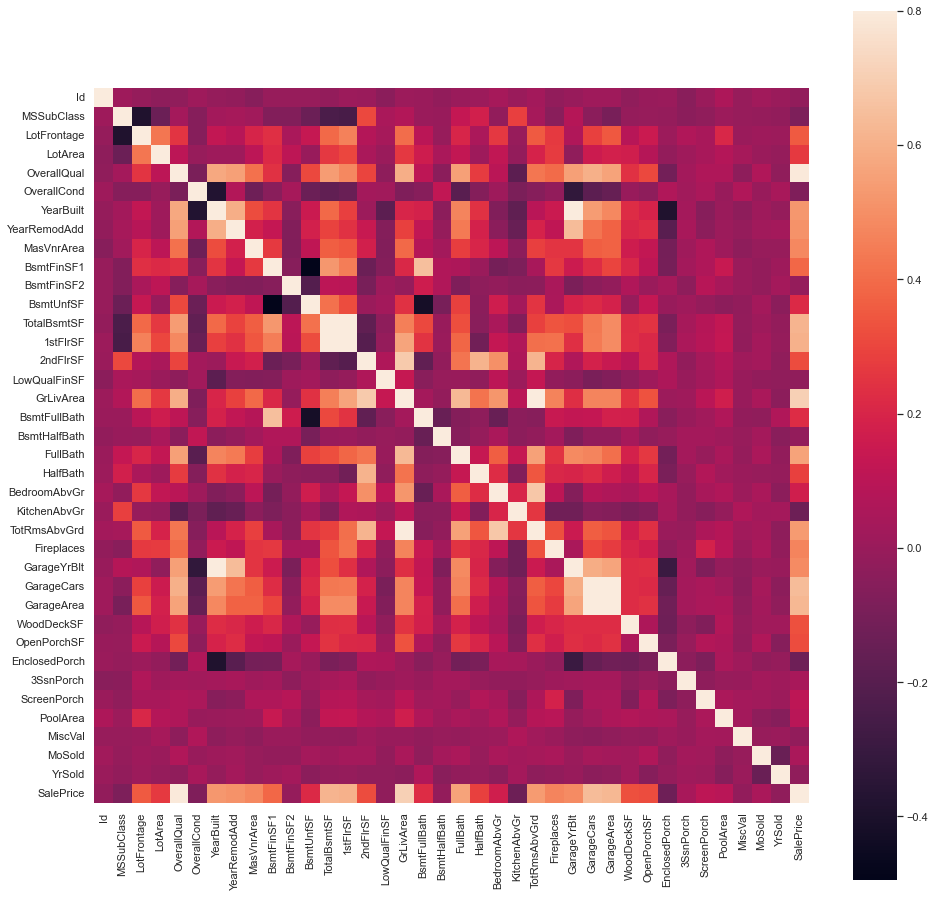

In [49]:
corrmat = train_dataset.corr()
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

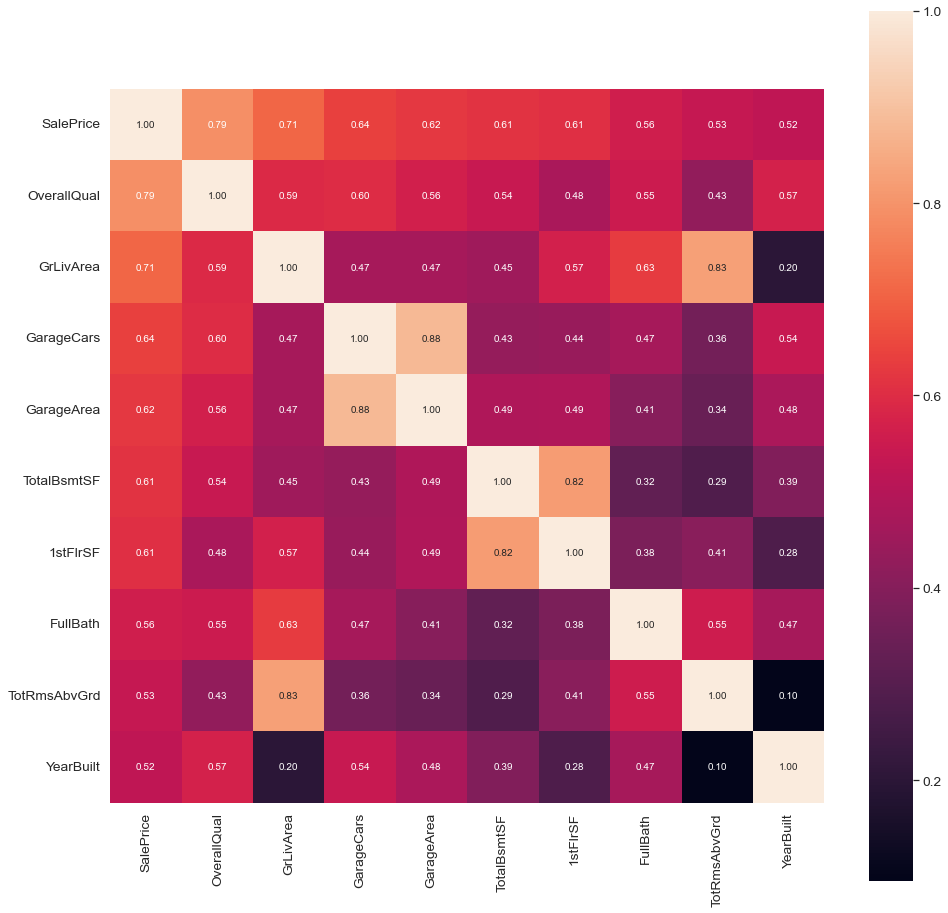

In [50]:
plt.figure(figsize=(16,16))
columns = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
correlation_matrix = np.corrcoef(train_dataset[columns].values.T)
sns.set(font_scale=1.25)
heat_map = sns.heatmap(correlation_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

In [51]:
train_dataset = train_dataset[train_dataset.GrLivArea < 4500]

In [52]:
total = test_dataset.isna().sum().sort_values(ascending=False)
# concatenate this data into dataframe
missing_data = pd.concat([total], axis=1, keys=["Total"])
missing_data.head(45)

,Total
PoolQC,1456
MiscFeature,1408
Alley,1352
Fence,1169
FireplaceQu,730
LotFrontage,227
GarageYrBlt,78
GarageQual,78
GarageFinish,78
GarageCond,78


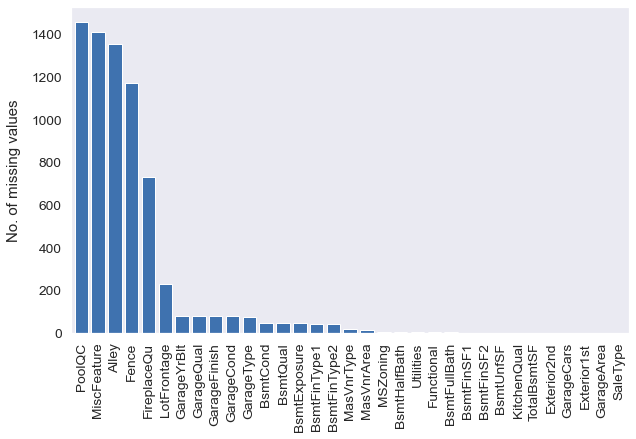

In [53]:
total = total[total > 0]
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid()
ax.bar(total.index, total.values, zorder=2, color="#3f72af")
ax.set_ylabel("No. of missing values", labelpad=10)
ax.set_xlim(-0.6, len(total) - 0.4)
ax.xaxis.set_tick_params(rotation=90)
plt.show()

In [54]:
train_dataset = train_dataset.drop(missing_data[missing_data.Total > 0 ].index, axis=1)

In [55]:
test_dataset = test_dataset.dropna(axis=1)
test_dataset = test_dataset.drop(["Electrical"], axis=1)

In [56]:
full_dataset = pd.concat([train_dataset, test_dataset])

In [57]:
full_dataset = pd.get_dummies(full_dataset)
X = full_dataset.iloc[train_dataset.index]
X_test = full_dataset.iloc[test_dataset.index]
X = X.drop(["SalePrice"], axis=1)
X.shape

(1458, 154)

In [58]:
y = train_dataset.SalePrice
y.shape

(1458,)

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)

In [60]:
X.isna().sum().sort_values(ascending=False)

Id                       0
RoofMatl_CompShg         0
HouseStyle_SLvl          0
RoofStyle_Flat           0
RoofStyle_Gable          0
                        ..
Neighborhood_Gilbert     0
Neighborhood_IDOTRR      0
Neighborhood_MeadowV     0
Neighborhood_Mitchel     0
SaleCondition_Partial    0
Length: 154, dtype: int64

In [61]:
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_val, y_val)

0.014656716430554884

In [62]:
X_test = X_test.drop(["SalePrice"], axis=1)

In [63]:
y_preds = regressor.predict(X_test)

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
xgb_reg = GradientBoostingClassifier(verbose = True, learning_rate = 0.05)
xgb_reg.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.7716           12.43m
         2           0.8451           12.68m
         3           0.5751           12.67m
         4           0.4803           12.58m
         5           0.4336           12.53m
         6           0.3959           12.48m
         7           0.3645           12.36m
         8           0.3314           12.21m
         9           0.3088           12.08m
        10           0.2851           11.94m
        20           0.1305           10.67m
        30           0.0664            9.29m
        40           0.0379            7.94m
        50           0.0234            6.61m
        60           0.0152            5.36m
        70           0.0102            4.02m
        80           0.0071            2.69m
        90           0.0050            1.34m
       100           0.0037            0.00s


GradientBoostingClassifier(learning_rate=0.05, verbose=True)

In [67]:
y_preds2 = xgb_reg.predict(X_test)

In [68]:
output = pd.DataFrame({'Id': test_dataset.Id,
                      'SalePrice': y_preds})
output.to_csv('submission1.csv', index=False)
output = pd.DataFrame({'Id': test_dataset.Id,
                      'SalePrice': y_preds2})
output.to_csv('submission2.csv', index=False)

In [69]:
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')

In [71]:
train_dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [72]:
train_dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [73]:
missing_data = test_dataset.isna().sum()
missing_data = missing_data[missing_data>0]
train_dataset = train_dataset.drop(missing_data.index, axis=1)

In [74]:
train_dataset.columns

Index(['Id', 'MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond',
       'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [75]:
train_dataset.isna().sum().sort_values(ascending=False)

Electrical       1
MSSubClass       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
Id               0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleCondition    0
PavedDrive       0
CentralAir       0
HeatingQC        0
BldgType         0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
HouseStyle       0
Heating          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
ExterQual        0
ExterCond        0
Foundation       0
SalePrice        0
dtype: int64

In [76]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 48 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   LotArea        1460 non-null   int64 
 3   Street         1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  OverallQual    1460 non-null   int64 
 14  OverallCond    1460 non-null   int64 
 15  YearBuilt      1460 non-null   int64 
 16  YearRemodAdd   1460 non-null   int64 
 17  RoofStyle      1460 non-null   object
 18  RoofMatl       1460 non-null

In [77]:
train_dataset = train_dataset.drop(["Electrical"], axis=1)

In [78]:
test_dataset = test_dataset.dropna(axis=1)

In [79]:
test_dataset.isna().sum().sort_values(ascending=False)

Id               0
Fireplaces       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
PavedDrive       0
CentralAir       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
Electrical       0
HeatingQC        0
MSSubClass       0
BldgType         0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
HouseStyle       0
Heating          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
ExterQual        0
ExterCond        0
Foundation       0
SaleCondition    0
dtype: int64

In [80]:
test_dataset = test_dataset.drop(["Electrical"], axis=1)

In [81]:
import numpy as np
len_test = np.arange(len(test_dataset))
len_test

array([   0,    1,    2, ..., 1456, 1457, 1458])

In [82]:
len_train = np.arange(len(train_dataset))
len_train

array([   0,    1,    2, ..., 1457, 1458, 1459])

In [85]:
output = pd.DataFrame({'Id': test_dataset.Id,
                      'SalePrice': y_preds2})
output.to_csv('submission.csv', index=False)
submission = pd.read_csv("submission.csv")
from tqdm import tqdm
for i in tqdm(len_test, desc="Progress - Test Rows"):
    for j in len_train:
        for k in np.arange(1, len(test_dataset.columns)):
            if test_dataset.iloc[i, k] == train_dataset.iloc[j, k]:
                continue
            else:
                break
        else:
            submission.iloc[i, 1] = train_dataset.iloc[j, -1]
            break


Progress - Test Rows: 100%|██████████| 1459/1459 [01:50<00:00, 13.25it/s]


In [86]:
submission.to_csv("submission.csv", index=False)

In [87]:
submission = pd.read_csv("sample_submission.csv")
from tqdm import tqdm
for i in tqdm(len_test, desc="Progress - Test Rows"):
    for j in len_train:
        for k in np.arange(1, len(test_dataset.columns)):
            if test_dataset.iloc[i, k] == train_dataset.iloc[j, k]:
                continue
            else:
                break
        else:
            submission.iloc[i, 1] = train_dataset.iloc[j, -1]
            break
submission.to_csv("submission.csv", index=False)

Progress - Test Rows: 100%|██████████| 1459/1459 [01:58<00:00, 12.32it/s]
